In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
Ynames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'identity']
featureNames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
filepath = 'magic04.data'
data = pd.read_csv(filepath, names=Ynames, header=None)
data['identity']= data['identity'].map({'g':1, 'h': 0}).astype(int) 
X = data[featureNames].values
Y = data['identity'].values.astype('int64')

In [3]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.33, random_state=None) 
train_Features[:2]

array([[-0.78020621, -0.23800107, -1.06396872,  1.20165703,  1.0953323 ,
        -0.37576118,  0.06346927,  0.77201027, -0.48711024,  0.25482428],
       [ 0.15902387,  0.34853822, -0.07980969, -0.84037233, -0.69820473,
         1.55749033, -0.60547814, -0.74196027,  1.03855348, -0.53968316]])

In [4]:
test_Features[:2]

array([[ 0.164276  ,  0.44718872,  1.86798301, -1.09966028, -0.90995431,
         0.43815998,  0.98673258,  0.81471467, -0.08000276, -0.11534922],
       [ 0.64055594,  0.77633078,  0.8063778 , -0.86553529, -0.85837429,
        -2.49599002,  1.42659019,  1.92677213,  2.08391872,  1.19159622]])

In [5]:
train_Label[:4]

array([1, 0, 1, 0])

In [6]:
train_Features = train_Features.reshape((train_Features.shape[0], train_Features.shape[1], 1))
test_Features = test_Features.reshape((test_Features.shape[0], test_Features.shape[1], 1))

In [7]:
train_Features.shape

(12743, 10, 1)

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv1D,MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

Using TensorFlow backend.


In [9]:
model = Sequential()

In [10]:
model.add(Conv1D(filters=30,
                 kernel_size=3,
                 padding='valid',
                 input_shape=(10,1), 
                 activation='relu'))

In [11]:
model.add(MaxPooling1D(pool_size=1))

In [12]:
model.add(Flatten())

In [13]:
model.add(Dense(10, activation='tanh'))

In [14]:
model.add(Dense(1,activation='sigmoid'))

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 8, 30)             120       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 8, 30)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 240)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2410      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 2,541
Trainable params: 2,541
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [17]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=30, 
                         batch_size=400,verbose=1)

Train on 10194 samples, validate on 2549 samples
Epoch 1/30
10194/10194 [==============================] - 3s 294us/step - loss: 0.5993 - acc: 0.6959 - val_loss: 0.5256 - val_acc: 0.7532
Epoch 2/30
10194/10194 [==============================] - 1s 56us/step - loss: 0.4858 - acc: 0.7789 - val_loss: 0.4613 - val_acc: 0.7893
Epoch 3/30
10194/10194 [==============================] - 1s 106us/step - loss: 0.4381 - acc: 0.8039 - val_loss: 0.4310 - val_acc: 0.8082
Epoch 4/30
10194/10194 [==============================] - 1s 92us/step - loss: 0.4144 - acc: 0.8175 - val_loss: 0.4123 - val_acc: 0.8227
Epoch 5/30
10194/10194 [==============================] - 1s 55us/step - loss: 0.3983 - acc: 0.8252 - val_loss: 0.3980 - val_acc: 0.8313
Epoch 6/30
10194/10194 [==============================] - 0s 47us/step - loss: 0.3863 - acc: 0.8331 - val_loss: 0.3881 - val_acc: 0.8403
Epoch 7/30
10194/10194 [==============================] - 0s 47us/step - loss: 0.3777 - acc: 0.8371 - val_loss: 0.3791 - val_ac

In [18]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

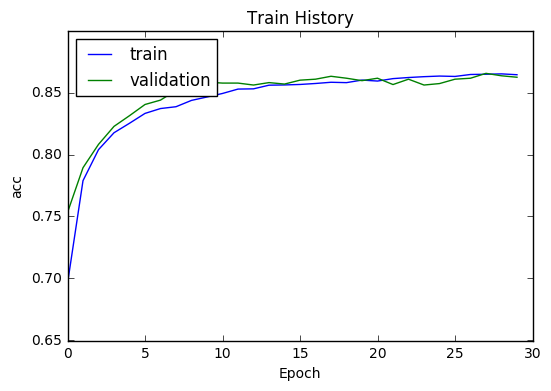

In [19]:
show_train_history(train_history,'acc','val_acc')

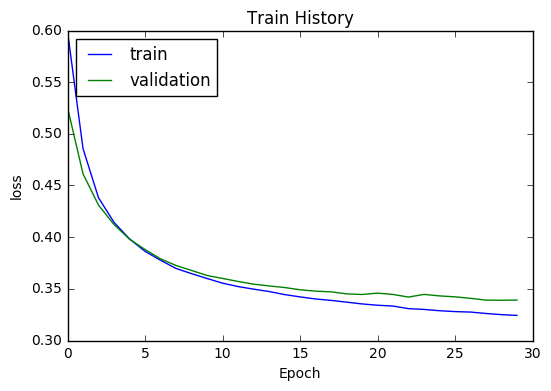

In [20]:
show_train_history(train_history,'loss','val_loss')

In [21]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

6277/6277 [==============================] - 1s 117us/step


In [22]:
scores[1]

0.868249163613191